# Regional separation

### Importing packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from fatiando.vis import mpl
import pandas as pd
import matplotlib as mpb
import cPickle as pickle
import matplotlib.patches as patches

/home/leo/anaconda2/lib/python2.7/site-packages/fatiando/vis/mpl.py:76: UserWarning: This module will be removed in v0.6. We recommend the use of matplotlib.pyplot module directly. Some of the fatiando specific functions will remain.
  "specific functions will remain.")


### Observation points and observed data

In [2]:
with open('data.pickle') as w:
        data = pickle.load(w)

In [3]:
dobs = data['tfa_obs']
xp = data['x']
yp = data['y']
zp = data['z']
N = data['N']

In [4]:
xp

array([ 8981.07703745,  8868.07703745,  8757.07703745, ...,
       15702.07703745, 15806.07703745, 15911.07703745])

### Data plot

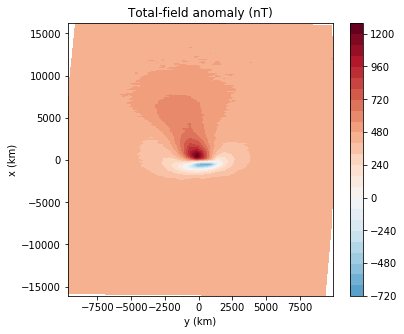

In [5]:
plt.figure(figsize=(6,5))

plt.subplot(1,1,1)
plt.title("Total-field anomaly (nT)")
#plt.axis('scaled')
norm=mpb.colors.Normalize(vmin=-np.max(dobs), vmax=np.max(dobs))
plt.tricontourf(yp, xp, dobs, 30, cmap ='RdBu_r', norm=norm)
plt.colorbar()
#plt.plot(yp, xp, 'ok', markersize=0.5)
plt.xlabel('y (km)')
plt.ylabel('x (km)')
#mpl.m2km()

plt.tight_layout(pad = 2.)

plt.show()

### Simple polynomial fitting

In [6]:
A = np.vstack((np.ones(N), xp, yp)).T

In [7]:
ATA = np.dot(A.T,A)
t = np.trace(ATA)/N
mu = 0.00000001*t

In [8]:
p1 = np.linalg.solve(ATA + mu*np.identity(3),np.dot(A.T,dobs))

In [9]:
tfa_regional1 = np.dot(A,p1)

In [10]:
tfa_residual1 = dobs - tfa_regional1

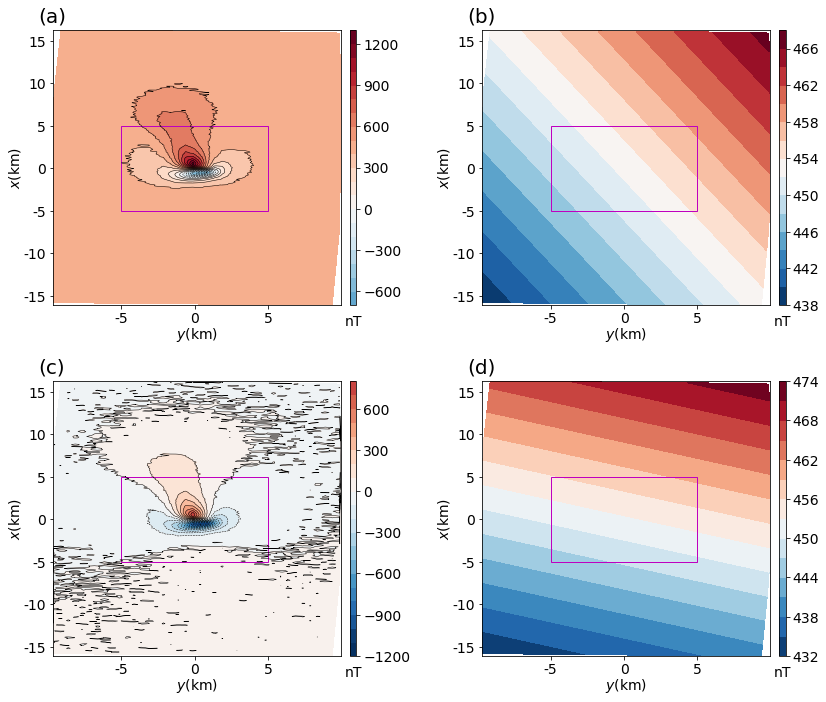

In [11]:
#plt.close('all')
plt.figure(figsize=(12,10))

# Create a Rectangle patch
rect = patches.Rectangle((-5000.,-5000.0), 10000,10000,linewidth=1,edgecolor='m',facecolor='none')

ax1=plt.subplot(2,2,1)
#plt.title("Observed data (nT)")
norm=mpb.colors.Normalize(vmin=-np.max(dobs), vmax=np.max(dobs))
#plt.axis('scaled')
plt.tricontour(yp, xp, dobs, 20, colors='k', linewidths=0.5)
plt.tricontourf(yp, xp, dobs, 20, cmap = plt.get_cmap('RdBu_r'), vmin=-np.max(dobs), vmax=np.max(dobs)).ax.tick_params(labelsize=14)
clb = plt.colorbar(pad=0.025, aspect=40, shrink=1)
clb.ax.set_title('nT', pad=-295, fontsize=14)
clb.ax.tick_params(labelsize=14)
plt.xlabel('$y$(km)', fontsize=14, labelpad=0)
plt.ylabel('$x$(km)', fontsize=14, labelpad=0)
ax1.add_patch(rect)
plt.text(np.min(yp)-1000, np.max(xp)+1000, '(a)', fontsize=20)
mpl.m2km()

ax4=plt.subplot(2,2,4)
rect = patches.Rectangle((-5000.,-5000.0), 10000,10000,linewidth=1,edgecolor='m',facecolor='none')
#plt.title("Estimanted regional data (nT)")
#plt.axis('scaled')
#norm=mpb.colors.Normalize(vmin=-np.max(tfa_regional1), vmax=np.max(tfa_regional1))
plt.tricontourf(yp, xp, tfa_regional1, 15, cmap = plt.get_cmap('RdBu_r'),
               vmin=np.min(tfa_regional1), vmax=np.max(tfa_regional1)).ax.tick_params(labelsize=14)
clb = plt.colorbar(pad=0.025, aspect=40, shrink=1)
clb.ax.set_title('nT', pad=-295, fontsize=14)
clb.ax.tick_params(labelsize=14)
plt.xlabel('$y$(km)', fontsize=14, labelpad=0)
plt.ylabel('$x$(km)', fontsize=14, labelpad=0)
ax4.add_patch(rect)
plt.text(np.min(yp)-1000, np.max(xp)+1000, '(d)', fontsize=20)
mpl.m2km()

ax3=plt.subplot(2,2,3)
rect = patches.Rectangle((-5000.,-5000.0), 10000,10000,linewidth=1,edgecolor='m',facecolor='none')
#plt.title("Residual data (nT)")
#plt.axis('scaled')
plt.tricontour(yp, xp, tfa_residual1, 20, colors='k', linewidths=0.5)
norm=mpb.colors.Normalize(vmin=np.min(tfa_residual1), vmax=-np.min(tfa_residual1))
plt.tricontourf(yp, xp, tfa_residual1, 20, cmap = plt.get_cmap('RdBu_r'), norm=norm).ax.tick_params(labelsize=14)
clb = plt.colorbar(pad=0.025, aspect=40, shrink=1)
clb.ax.set_title('nT', pad=-295, fontsize=14)
clb.ax.tick_params(labelsize=14)
plt.xlabel('$y$(km)', fontsize=14, labelpad=0)
plt.ylabel('$x$(km)', fontsize=14, labelpad=0)
ax3.add_patch(rect)
plt.text(np.min(yp)-1000, np.max(xp)+1000, '(c)', fontsize=20)
mpl.m2km()

ax2=plt.subplot(2,2,2)
rect = patches.Rectangle((-5000.,-5000.0), 10000,10000,linewidth=1,edgecolor='m',facecolor='none')
#plt.title("True regional data (nT)")
#plt.axis('scaled')
#norm=mpb.colors.Normalize(vmin=-np.max(data['regional']), vmax=np.max(data['regional']))
plt.tricontourf(yp, xp, data['regional'], 15, cmap = plt.get_cmap('RdBu_r'),
               vmin=np.min(data['regional']), vmax=np.max(data['regional'])).ax.tick_params(labelsize=14)
clb = plt.colorbar(pad=0.025, aspect=40, shrink=1)
clb.ax.tick_params(labelsize=14)
clb.ax.set_title('nT', pad=-295, fontsize=14)
plt.xlabel('$y$(km)', fontsize=14, labelpad=0)
plt.ylabel('$x$(km)', fontsize=14, labelpad=0)
ax2.add_patch(rect)
plt.text(np.min(yp)-1000, np.max(xp)+1000, '(b)', fontsize=20)
mpl.m2km()

# Add the patch to the Axes


plt.tight_layout(pad = 2.)

plt.savefig('../../manuscript/figures/regional-data-large.png', dpi=300, bbox_inches='tight')

plt.show()

Dipping model with regional field simulation. (a) Noise-corrupted total-field anomaly composed of a simulated residual field due to 
dipping model and a regional field (shown in panel (b)). (b) Simulated regional field through a first-order polynomial. 
(c) Residual total-field anomaly after subtracting from the original anomaly (shown in panel (a)) a
regional total-field anomaly (shown in panel (d)) obtained by a least-squares polynomial fitting. 
(d)  Regional total-field anomaly approximated by a least-squares polynomial fitting to the original anomaly (shown in panel (a)). The magenta rectangle delimits the data to be inverted.

In [12]:
data['res_data'] = tfa_residual1

In [13]:
data['est_regional'] = tfa_regional1

In [14]:
d = {'x': xp, 'y': yp, 'z': zp, 'tfa_true': data['tfa'], 'dobs': data['tfa_obs'], 'res_data': tfa_residual1, 'regional': tfa_regional1}

In [15]:
dataset = pd.DataFrame(d)

In [16]:
mask = (dataset['y'] <= 5000.) & (dataset['y'] >= -5000.) & (dataset['x'] <= 5000.) & (dataset['x'] >= -5000.)
d2 = dataset[mask]
d2.reset_index(inplace=True)

In [17]:
d2.to_csv('dipping_regional_data.txt', sep=' ')